In [5]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import pylab as p
from scipy.spatial import ConvexHull
from sklearn import datasets


data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


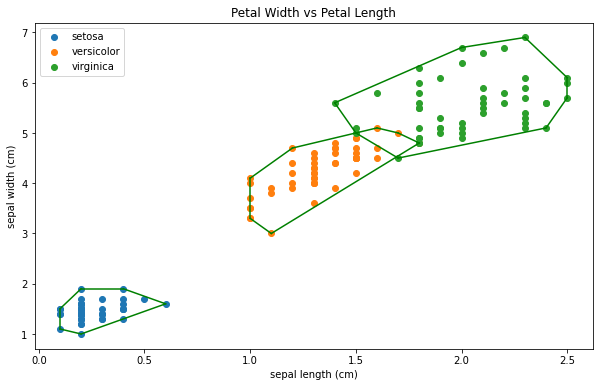

In [64]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

# print(data.target_names)

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    # print(bucket)
    # ini buat ngambil kolom di dataset nya
    bucket = bucket.iloc[:,[3,2]].values 
    # print(bucket)   
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi
                                # ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    # ini buat warnain convex hull nya
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[2])
plt.legend()

[5.552 2.026]


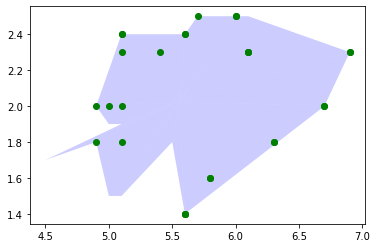

In [63]:
import numpy as n, pylab as p, time

def _angle_to_point(point, centre):
    '''calculate angle in 2-D between points and x axis'''
    delta = point - centre
    res = n.arctan(delta[1] / delta[0])
    if delta[0] < 0:
        res += n.pi
    return res


def _draw_triangle(p1, p2, p3, **kwargs):
    tmp = n.vstack((p1,p2,p3))
    x,y = [x[0] for x in zip(tmp.transpose())]
    p.fill(x,y, **kwargs)
    #time.sleep(0.2)


def area_of_triangle(p1, p2, p3):
    '''calculate area of any triangle given co-ordinates of the corners'''
    return n.linalg.norm(n.cross((p2 - p1), (p3 - p1)))/2.


def convex_hull(points, graphic=True, smidgen=0.0075):

    # if graphic:
    #     p.clf()
    #     p.plot(points[0], points[1], 'ro')
    n_pts = points.shape[1]
    assert(n_pts > 5)
    centre = points.mean(1)
    print(centre)
    # if graphic: p.plot((centre[0],),(centre[1],),'bo')
    angles = n.apply_along_axis(_angle_to_point, 0, points, centre)
    pts_ord = points[:,angles.argsort()]
    # if graphic:
    #     for i in range(n_pts):
    #         p.text(pts_ord[0,i] + smidgen, pts_ord[1,i] + smidgen, \
    #                '%d' % i)
    pts = [x[0] for x in zip(pts_ord.transpose())]
    prev_pts = len(pts) + 1
    k = 0
    while prev_pts > n_pts:
        prev_pts = n_pts
        n_pts = len(pts)
        if graphic: p.gca().patches = []
        i = -2
        while i < (n_pts - 2):
            Aij = area_of_triangle(centre, pts[i],     pts[(i + 1) % n_pts])
            Ajk = area_of_triangle(centre, pts[(i + 1) % n_pts], \
                                   pts[(i + 2) % n_pts])
            Aik = area_of_triangle(centre, pts[i],     pts[(i + 2) % n_pts])
            if graphic:
                _draw_triangle(centre, pts[i], pts[(i + 1) % n_pts], \
                               facecolor='blue', alpha = 0.2)
                # _draw_triangle(centre, pts[(i + 1) % n_pts], \
                #                pts[(i + 2) % n_pts], \
                #                facecolor='green', alpha = 0.2)
                # _draw_triangle(centre, pts[i], pts[(i + 2) % n_pts], \
                #                facecolor='red', alpha = 0.2)
            if Aij + Ajk < Aik:
                if graphic: p.plot((pts[i][0],),(pts[i][1],),'go')
                del pts[i+1]
            i += 1
            n_pts = len(pts)
        k += 1
    return n.asarray(pts)

if __name__ == "__main__":
    points = n.random.random_sample((2,40))
    bucket = bucket.transpose()
    hull_pts = convex_hull(bucket)